## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

### t-test 수치가 괜찮은 친구들

- url_num_hyphens_dom (statistic=21.611468324602658, pvalue=7.450704816136977e-97)

- url_hostname_len (statistic=23.66764057856173, pvalue=2.4831847344086415e-114)

- url_num_underscores (statistic=-7.672537460263797, pvalue=2.217920239673321e-14)

- url_query_len (statistic=10.978270060909715, pvalue=1.4834949554079937e-27)

- url_num_query_para (statistic=10.667013308147133, pvalue=3.934486909081105e-26)

- url_entropy (statistic=9.340482438305928, pvalue=1.7337171490851634e-20)

- html_num_tags(script) (statistic=-11.738810968999502, pvalue=3.438162226395458e-31)

### kdeplot상에서 연관이 보이는 친구들

- url_num_underscores  

- url_entropy

- html_num_tags(iframe)  

- html_num_tags(script)   

- html_num_tags(form)

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [406]:
#Tensorflow 설치하기
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import * 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

* 데이터 프레임 관련 라이브러리

In [513]:
#라이브러리 불러오기
from doctest import testfile


test = pd.read_csv('test_dataset_v01.csv', index_col=0)
delete_col = ['url_chinese_present', 'url_port', "html_num_tags('embed')", "html_num_tags('applet')", 'url_query_len', 'url_num_query_para']
test.drop(delete_col, axis = 1, inplace = True)
test['query_len/query_para_(one_para_len)'] = data['url_query_len'] / data['url_num_query_para']
test = test.replace([np.inf, -np.inf], 100)
test = test.fillna(0)
# for i in test:
#     test[i] = test[i].fillna(test[i].mode()[0])
# 컬럼명 변경
test.rename(columns={"html_num_tags('iframe')" : 'html_num_tags(iframe)', 
                     "html_num_tags('script')" : "html_num_tags(script)", 
                     "html_num_tags('object')" : "html_num_tags(object)", 
                     "html_num_tags('div')" : "html_num_tags(div)", 
                     "html_num_tags('head')" : "html_num_tags(head)", 
                     "html_num_tags('body')" : "html_num_tags(body)", 
                     "html_num_tags('form')" : "html_num_tags(form)", 
                     "html_num_tags('a')" : "html_num_tags(a)"}, inplace = True)
print(test.isna().sum())
print(test.info())
print(test.shape)
display(test.tail())


url_len                                0
url_num_hyphens_dom                    0
url_path_len                           0
url_domain_len                         0
url_hostname_len                       0
                                      ..
html_num_tags(head)                    0
html_num_tags(body)                    0
html_num_tags(form)                    0
html_num_tags(a)                       0
query_len/query_para_(one_para_len)    0
Length: 18, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   url_len                              2441 non-null   int64  
 1   url_num_hyphens_dom                  2441 non-null   int64  
 2   url_path_len                         2441 non-null   float64
 3   url_domain_len                       2441 non-null   float64
 4   url_hostname_len

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),query_len/query_para_(one_para_len)
2436,63,0,0.0,17.0,0.0,4,2,0,4.738082,1,18.0,0,79,1,1,1.0,119.0,0.0
2437,36,0,1.0,35.0,35.0,2,0,0,4.080351,0,27.0,0,57,1,1,1.0,0.0,0.0
2438,45,1,23.0,22.0,0.0,2,0,0,4.359443,0,8.0,0,199,1,1,2.0,0.0,0.0
2439,24,0,10.0,14.0,0.0,3,0,1,4.260333,0,3.0,0,90,1,1,2.0,25.0,0.0
2440,33,2,0.0,22.0,22.0,2,0,0,4.155498,3,36.0,0,162,1,1,4.0,213.0,0.0


### **나.  학습데이터 불러오기**

In [519]:
data = pd.read_csv('train_dataset.csv', index_col=0)
data

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


### **다.  데이터 전처리**

In [496]:
# 악성사이트 여부 가변수화
data['Result_v1'] = data['Result_v1'].map({'malicious': -1, 'benign': 1})

# drop NaN
data.dropna(axis = 1, inplace = True)

# 의미없는 열 삭제
delete_col = []
for i in data:
    count_0 = len(data.loc[data[i] == 0])
    if count_0 >= 3600:
        delete_col.append(i)
print('0값이 3600개 이상 존재열 : ', delete_col)

data.drop(delete_col, axis = 1, inplace = True)

0값이 3600개 이상 존재열 :  ['url_chinese_present', 'url_port', "html_num_tags('embed')", "html_num_tags('applet')"]


In [497]:
# 컬럼명 변경
data.rename(columns={"html_num_tags('iframe')" : 'html_num_tags(iframe)', 
                     "html_num_tags('script')" : "html_num_tags(script)", 
                     "html_num_tags('object')" : "html_num_tags(object)", 
                     "html_num_tags('div')" : "html_num_tags(div)", 
                     "html_num_tags('head')" : "html_num_tags(head)", 
                     "html_num_tags('body')" : "html_num_tags(body)", 
                     "html_num_tags('form')" : "html_num_tags(form)", 
                     "html_num_tags('a')" : "html_num_tags(a)"}, inplace = True)

In [498]:
# 중복 데이터 제거를 제거합니다.
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
ddp = pd.DataFrame(data.duplicated())
display(ddp.value_counts())

data.drop_duplicates(keep='first', inplace=True)

False    3231
True      433
dtype: int64

In [499]:
# 새로운 열 추가, 쿼리 파라미터 1개당 길이
data['query_len/query_para_(one_para_len)'] = data['url_query_len'] / data['url_num_query_para']
data = data.replace([np.inf, -np.inf], 100)
data = data.fillna(0)

In [500]:
# 데이터 확인
display(data.head(10))
print(data.isna().sum())
print(data.info())
display(data.describe())

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),Result_v1,query_len/query_para_(one_para_len)
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,-1,0.0
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,1.0,1.0,0.0,21.0,1,0.0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,1.0,1.0,3.0,70.0,1,0.0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,1.0,1.0,55.0,1,0.0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,1.0,1.0,0.0,321.0,1,0.0
5,18.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,3.943465,0.0,4.0,1.0,3.0,1.0,1.0,0.0,18.0,1,0.0
6,49.0,0.0,19.0,4.0,0.0,0.0,0.0,0.0,4.251365,0.0,8.0,0.0,19.0,1.0,1.0,1.0,4.0,-1,0.0
7,25.0,0.0,25.0,2.0,0.0,0.0,0.0,0.0,3.890320,0.0,22.0,0.0,333.0,1.0,1.0,1.0,155.0,1,0.0
8,39.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,4.417174,0.0,17.0,0.0,32.0,1.0,1.0,2.0,29.0,1,0.0
9,40.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.772055,0.0,3.0,0.0,18.0,1.0,1.0,0.0,2.0,-1,0.0


url_len                                0
url_num_hyphens_dom                    0
url_hostname_len                       0
url_num_dots                           0
url_num_underscores                    0
url_query_len                          0
url_num_query_para                     0
url_ip_present                         0
url_entropy                            0
html_num_tags(iframe)                  0
html_num_tags(script)                  0
html_num_tags(object)                  0
html_num_tags(div)                     0
html_num_tags(head)                    0
html_num_tags(body)                    0
html_num_tags(form)                    0
html_num_tags(a)                       0
Result_v1                              0
query_len/query_para_(one_para_len)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                        

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),Result_v1,query_len/query_para_(one_para_len)
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,56.121944,0.421232,20.450944,2.520891,0.285361,4.984215,0.110492,0.060972,4.232582,0.216961,8.659239,0.030641,69.792943,0.998143,1.016404,0.993810,63.254101,0.000310,3.560782
std,86.569208,0.861582,9.902215,1.562163,1.169914,26.287905,0.599162,0.239316,0.394697,0.918491,12.769059,0.248816,387.505363,0.142934,0.226790,1.574947,360.632590,1.000155,16.482694
min,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,24.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.992151,0.000000,2.000000,0.000000,5.000000,1.000000,1.000000,0.000000,2.000000,-1.000000,0.000000
50%,36.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.195816,0.000000,4.000000,0.000000,32.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000
75%,57.000000,1.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.470114,0.000000,12.000000,0.000000,60.000000,1.000000,1.000000,1.000000,49.000000,1.000000,0.000000
max,1837.000000,14.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,26.000000,267.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,1.000000,312.000000


### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [501]:
target = 'Result_v1'
x = data.drop(target, axis=1)
y = data.loc[:, target]
display(x, y)

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),query_len/query_para_(one_para_len)
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0
3658,14.0,0.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0
3659,68.0,3.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0
3660,66.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,1.0,14.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0


0      -1
1       1
2       1
3       1
4       1
       ..
3657    1
3658    1
3659   -1
3660    1
3663    1
Name: Result_v1, Length: 3231, dtype: int64

In [502]:
# train_test_split 사용
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)
display(x_train, x_val)

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),query_len/query_para_(one_para_len)
3418,29.0,0.0,17.0,2.0,1.0,0.0,0.0,0.0,4.086049,0.0,13.0,0.0,20.0,1.0,1.0,1.0,44.0,0.0
2703,47.0,0.0,18.0,3.0,0.0,0.0,0.0,0.0,4.397772,0.0,16.0,0.0,25.0,1.0,1.0,0.0,60.0,0.0
2281,32.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,4.179776,1.0,2.0,0.0,53.0,1.0,1.0,2.0,5.0,0.0
1998,34.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,4.196155,0.0,9.0,0.0,8.0,1.0,1.0,1.0,4.0,0.0
448,20.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,4.032303,0.0,14.0,0.0,15.0,2.0,2.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,44.0,2.0,34.0,3.0,0.0,0.0,0.0,0.0,4.188340,0.0,2.0,0.0,41.0,1.0,1.0,1.0,18.0,0.0
2818,118.0,0.0,13.0,1.0,0.0,5.0,0.0,0.0,4.319859,0.0,5.0,0.0,31.0,1.0,1.0,1.0,1.0,100.0
2168,22.0,1.0,21.0,2.0,0.0,0.0,0.0,0.0,4.047299,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0
2075,30.0,0.0,21.0,4.0,0.0,0.0,0.0,0.0,4.154871,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0


,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),query_len/query_para_(one_para_len)
592,58.0,2.0,44.0,2.0,0.0,0.0,0.0,0.0,4.456361,0.0,15.0,0.0,36.0,1.0,1.0,1.0,2.0,0.0
1886,32.0,2.0,32.0,2.0,0.0,0.0,0.0,0.0,3.974648,1.0,12.0,0.0,9.0,1.0,1.0,0.0,45.0,0.0
1653,22.0,1.0,21.0,1.0,0.0,0.0,0.0,0.0,3.840403,0.0,45.0,0.0,88.0,1.0,1.0,1.0,38.0,0.0
2474,27.0,0.0,13.0,4.0,0.0,0.0,0.0,1.0,4.278352,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3072,36.0,2.0,28.0,1.0,0.0,0.0,0.0,0.0,4.072624,0.0,2.0,0.0,41.0,1.0,1.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,136.0,0.0,16.0,2.0,2.0,0.0,0.0,0.0,4.652699,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0
2309,33.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,3.857314,0.0,33.0,0.0,81.0,1.0,1.0,6.0,49.0,0.0
1652,31.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.378992,0.0,16.0,0.0,361.0,1.0,1.0,4.0,294.0,0.0
2275,22.0,1.0,21.0,2.0,0.0,0.0,0.0,0.0,4.254196,0.0,8.0,0.0,415.0,1.0,1.0,2.0,4.0,0.0


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [503]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [504]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


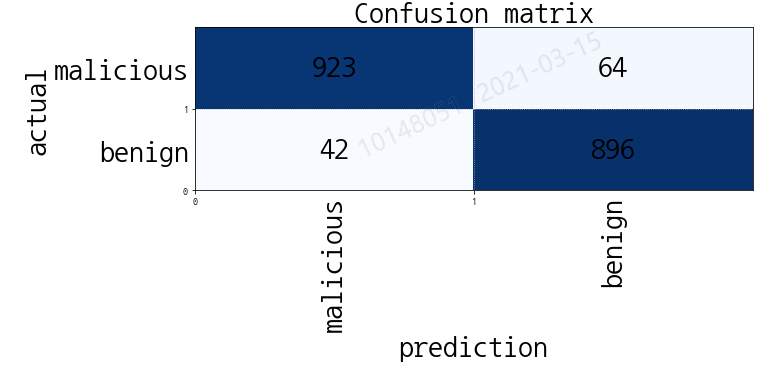

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

# LogisticRegression (all)

In [514]:
# 1. import
from sklearn.linear_model import LogisticRegression

In [515]:
# 2.선언 
# features = ['url_entropy']
# x_train_LOR = x_train[features]
# x_val_LOR = x_val[features]

model_LOR_all = LogisticRegression()

In [516]:
# 3. fit(), 학습
model_LOR_all.fit(x_train, y_train)

LogisticRegression()

In [517]:
# 4. predict(), 예측
pred_LOR_all = model_LOR_all.predict(test)

In [518]:
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred_LOR_all})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer16.csv')

,expected
id,
0,1
1,1
2,1
3,1
4,1
...,...
2436,1
2437,1
2438,-1


In [454]:
# train 및 val 데이터 정확도 확인 
pred_LOR_all

# answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred_LOR_all})
# answer_df.set_index('id', inplace=True)
# display(answer_df)
# answer_df.to_csv('answer2.csv')
# pd.options.display.float_format = '{:.10f}'.format
# pd.reset_option('display.float_format')

print(list(x_train))
print('=='*30)
print(model_LOR_sel.coef_)
print('=='*30)
print('accuracy_score :',accuracy_score( y_val , pred_LOR_all ))
print('=='*30)
print('recall_score :',recall_score(y_val, pred_LOR_all))
print('=='*30)
print('f1_score :',f1_score(y_val, pred_LOR_all))

['url_len', 'url_num_hyphens_dom', 'url_hostname_len', 'url_num_dots', 'url_num_underscores', 'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy', 'html_num_tags(iframe)', 'html_num_tags(script)', 'html_num_tags(object)', 'html_num_tags(div)', 'html_num_tags(head)', 'html_num_tags(body)', 'html_num_tags(form)', 'html_num_tags(a)', 'query_len/query_para_(one_para_len)']
[[ 0.59773814  0.05937765  0.18125929 -1.18501811 -0.35911796 -1.07701241
  -0.16076879 -0.63826836 -0.08483142]]
accuracy_score : 0.845360824742268
recall_score : 0.8742138364779874
f1_score : 0.8475609756097561


In [423]:
# # Test 데이터 결과 Confusion Matrix 확인
# confusion = confusion_matrix(y_val, pred_LOR_all )
# fig, ax = plt.subplots(figsize=(10,3))
# plot_confusion_matrix(ax, confusion, fontsize=30)

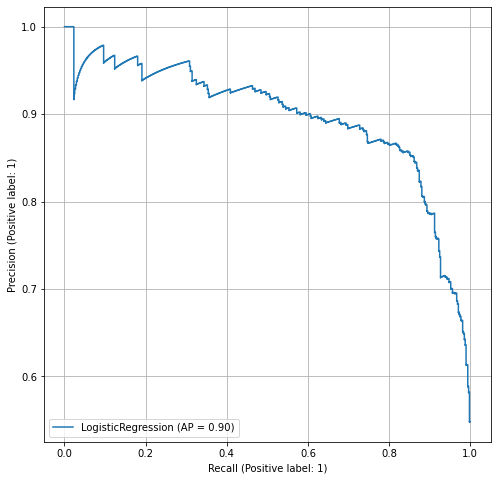

0.8963331310427805


In [424]:
plt.figure(figsize = (8,8))
pr_curve = plot_precision_recall_curve(model_LOR_all, x_val, y_val, ax = plt.gca())
plt.grid()
plt.show()
print(pr_curve.average_precision)

In [425]:
# Feature(특징)별 가중치 확인
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [426]:
# result = plot_feature_importance(model_LOR_all.feature_importances_, list(x_train))

# LogisticRegression (select)

In [483]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

def forward_stepwise_linear(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = OLS(y_train, add_constant(x_tr)).fit(disp=False)
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [484]:
vars, result = forward_stepwise_linear(x_train, y_train)
vars

['url_hostname_len',
 'html_num_tags(a)',
 'url_query_len',
 'url_num_hyphens_dom',
 'url_num_underscores',
 'html_num_tags(form)',
 'html_num_tags(script)',
 'url_num_dots',
 'url_entropy',
 'html_num_tags(body)',
 'html_num_tags(div)',
 'url_num_query_para',
 'query_len/query_para_(one_para_len)',
 'html_num_tags(object)',
 'html_num_tags(iframe)']

In [485]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'html_num_tags(iframe)',
       'html_num_tags(script)', 'html_num_tags(object)', 'html_num_tags(div)',
       'html_num_tags(head)', 'html_num_tags(body)', 'html_num_tags(form)',
       'html_num_tags(a)', 'Result_v1', 'query_len/query_para_(one_para_len)'],
      dtype='object')

In [486]:
model_LOR_all.coef_

array([[-2.74451095e-05, -1.14594671e+00, -6.37569251e-02,
         1.24011512e-01,  1.46828204e+00, -6.02799181e-01,
        -2.46181281e-02, -4.35919096e-02,  2.22192391e-01,
        -4.05850168e-01,  4.10623848e-02,  3.99240449e-01,
        -3.28325950e-03,  1.42676853e-01, -3.98641381e-01,
        -7.26676468e-01,  2.67793549e-02, -4.96285385e-01]])

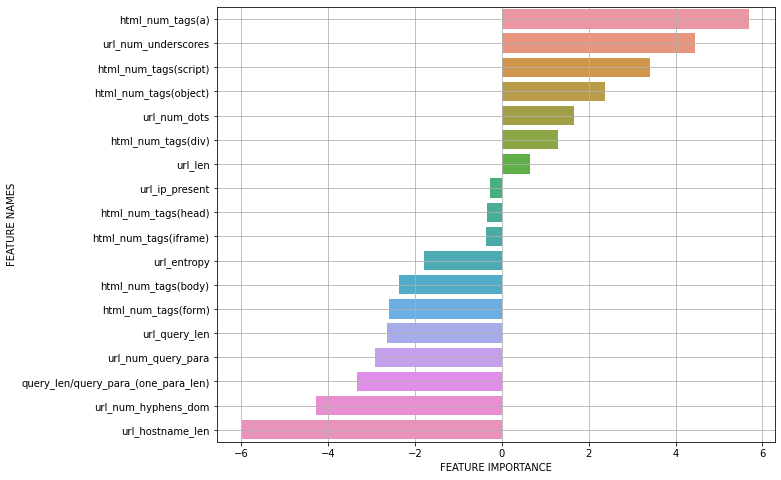

In [487]:
import seaborn as sns
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df
import itertools
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)

# 다시 모델링
model7 = LogisticRegression()
model7.fit(x_train_s, y_train)
model7.coef_
list2 = list(itertools.chain(*model7.coef_))
# print(list(x_train))
r = plot_feature_importance(list2, list(x_train))

In [488]:
test.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_ip_present', 'url_entropy', 'html_num_tags(iframe)',
       'html_num_tags(script)', 'html_num_tags(object)', 'html_num_tags(div)',
       'html_num_tags(head)', 'html_num_tags(body)', 'html_num_tags(form)',
       'html_num_tags(a)', 'query_len/query_para_(one_para_len)'],
      dtype='object')

In [494]:
vars2 = ['url_num_underscores',
         'html_num_tags(script)',
         'url_num_dots',
         'html_num_tags(body)',
         'html_num_tags(form)',
         'url_entropy',
         'html_num_tags(head)',
         'url_num_hyphens_dom',
         'url_hostname_len']
# 선택된 변수
model_LOR_sel = LogisticRegression()
model_LOR_sel.fit(x_train[vars], y_train)
pred_LOR_sel = model_LOR_sel.predict(test[vars])
pred_LOR_sel
# print(list(x_train[vars2]))
# print('=='*30)
# print(model_LOR_sel.coef_)
# print('=='*30)
# print('accuracy_score :',accuracy_score( y_val , pred_LOR_sel ))
# print('=='*30)
# print('recall_score :',recall_score(y_val, pred_LOR_sel))
# print('=='*30)
# print('f1_score :',f1_score(y_val, pred_LOR_sel))

KeyError: "['url_query_len', 'url_num_query_para'] not in index"

In [443]:
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred_LOR_sel})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer13test1변수중요4로지스틱회귀.csv')

,expected
id,
0,-1
1,1
2,1
3,-1
4,-1
...,...
2436,1
2437,-1
2438,1


In [434]:
# # Test 데이터 결과 Confusion Matrix 확인
# confusion = confusion_matrix(y_val, pred_LOR_sel )
# fig, ax = plt.subplots(figsize=(10,3))
# plot_confusion_matrix(ax, confusion, fontsize=30)

ValueError: Found input variables with inconsistent numbers of samples: [970, 2441]

## 다중 공선성 확인

url_hostname_len, url_num_hyphens_dom : 0.590 (호스트네임이 길면 하이픈이 많음, 호스트네임에는 하이픈이 잘 들어감) --> url_hostname_len 제거

url_num_underscores, url_len : 0.307 (언더바가 많으면 url이 김) --> url_len 제거

url_query_len, url_len : 0.319 (쿼리가 길면 url이 김) --> url_len 제거

url_num_query_para, url_query_len : 0.834 (쿼리의 파라미터 개수가 많아지면 당연히 쿼리도 길어짐) --> 'query_len/query_para_(one_para_len)' 쿼리 하나당 길이열을 추가해 하나만 사용

html_num_tags(a), html_num_tags(div) : 0.840 (html에서 a가 많아지면 div도 같이 많아짐, 같이 쓰인다는거 같음) --> html_num_tags(div) 제거

vars = ['url_hostname_len',
 'html_num_tags(script)',
 'query_len/query_para_(one_para_len)',
 'url_num_hyphens_dom',
 'html_num_tags(form)',
 'url_num_underscores',
 'url_num_query_para',
 'html_num_tags(a)',
 'html_num_tags(body)',
 'html_num_tags(object)',
 'url_num_dots',
 'url_entropy']  
 에서 위의 것 들을 제거  
 ['html_num_tags(script)',
 'query_len/query_para_(one_para_len)',
 'url_num_hyphens_dom',
 'html_num_tags(form)',
 'url_num_underscores',
 'html_num_tags(a)',
 'html_num_tags(body)',
 'html_num_tags(object)',
 'url_num_dots',
 'url_entropy']

In [472]:
vars2 = ['html_num_tags(script)',
 'query_len/query_para_(one_para_len)',
 'url_num_hyphens_dom',
 'html_num_tags(form)',
 'url_num_underscores',
 'html_num_tags(a)',
 'html_num_tags(body)',
 'html_num_tags(object)',
 'url_num_dots',
 'url_entropy']

# 선택된 변수
model_LOR_sel2 = LogisticRegression()
model_LOR_sel2.fit(x_train[vars2], y_train)
pred_LOR_sel2 = model_LOR_sel2.predict(x_val[vars2])

print(list(vars2))
print('=='*70)
print(model_LOR_sel2.coef_)
print('=='*70)
print('accuracy_score :',accuracy_score( y_val , pred_LOR_sel2 ))
print('=='*70)
print('recall_score :',recall_score(y_val, pred_LOR_sel2))
print('=='*70)
print('f1_score :',f1_score(y_val, pred_LOR_sel2))

['html_num_tags(script)', 'query_len/query_para_(one_para_len)', 'url_num_hyphens_dom', 'html_num_tags(form)', 'url_num_underscores', 'html_num_tags(a)', 'html_num_tags(body)', 'html_num_tags(object)', 'url_num_dots', 'url_entropy']
[[ 0.03456788 -1.06864915 -1.34197274 -0.75738299  1.74314815  0.02141335
  -1.38615952  2.15104943  0.12569568 -0.15335038]]
accuracy_score : 0.8278350515463917
recall_score : 0.8427672955974843
f1_score : 0.8280123583934089


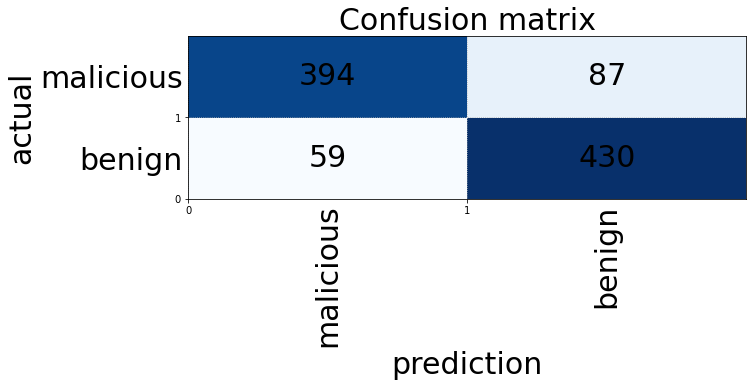

In [470]:
# Test 데이터 결과 Confusion Matrix 확인
confusion2 = confusion_matrix(y_val, pred_LOR_all )
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [ ]:
vars2 = ['html_num_tags(script)',
 'query_len/query_para_(one_para_len)',
 'url_num_hyphens_dom',
 'html_num_tags(form)',
 'url_num_underscores',
 'html_num_tags(a)',
 'html_num_tags(body)',
 'html_num_tags(object)',
 'url_num_dots',
 'url_entropy']

model_LOR_sel2 = LogisticRegression()
model_LOR_sel2.fit(x_train[vars2], y_train)
pred_LOR_sel2 = model_LOR_sel2.predict(test[vars2])
display(pred_LOR_sel2)


array([-1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [ ]:
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred_LOR_sel2})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer6.csv')

,expected
id,
0,-1
1,1
2,1
3,-1
4,-1
...,...
2436,1
2437,1
2438,-1


# KNN

- 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler # 0~1 값으로 변환

scaler = MinMaxScaler() # 선언
x_train_smm = scaler.fit_transform(x_train) # fit_transform : fit + transform = 기준을 찾고, 적용
x_val_smm = scaler.transform(x_val) # 적용만, 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
x_train_ss = scaler2.fit_transform(x_train)
x_val_ss = scaler2.transform(x_val)

In [ ]:
x_train_smm = pd.DataFrame(x_train_smm, columns = list(x))
x_train_ss = pd.DataFrame(x_train_ss, columns = list(x))

In [ ]:
y_val

531     1
1183   -1
2127   -1
2460   -1
3222    1
       ..
2365    1
1141   -1
1448    1
2596   -1
1647    1
Name: Result_v1, Length: 970, dtype: int64

In [ ]:
# 모델링용
from sklearn.neighbors import KNeighborsRegressor    

# 회귀모델 평가용
from sklearn.metrics import * 
# 값의 범위를 지정
params = { 'n_neighbors' : range(1,51), 'metric' : ['euclidean', 'manhattan']  }

model_KNN_mm = KNeighborsRegressor() # k : 기본값 5
model_KNN_rs = RandomizedSearchCV(model_KNN_mm
                        , params              # hyperparameter 범위 지정.
                        , cv=10                    # k-fold Cross Validation
                        , n_iter=10                # Random하게 시도할 횟수
                        )
model_KNN_rs.fit(x_train_smm , y_train)
model_KNN_rs.cv_results_ # 튜닝 결과
print('=='*70)
print(model_KNN_rs.cv_results_['params'])
print('=='*70)
print(model_KNN_rs.cv_results_['mean_test_score'])
print('=='*70)
print(model_KNN_rs.best_params_) # 계속 오락가락하는건 양수를 1로, 음수를 -1로 변환해줘서 그런거같음
print('=='*70)
print(model_KNN_rs.best_score_)
print('=='*70)
pred_KNN_mm = model_KNN_rs.predict(x_val_smm)
pred_KNN_best = np.where(pred_KNN_mm > 0, 1 , -1) # 값을 소수점으로 반환하기 때문에 양수는1, 음수는 -1로 바꿔줌
print(print(classification_report(y_val, pred_KNN_best)))
# pred_KNN_mm = model_KNN_rs.predict(x_val_smm)
# rmse.append(mean_squared_error(y_val, pred_KNN_mm, squared = False))
# mae.append(mean_absolute_error(y_val, pred_KNN_mm))
# mape.append(mean_absolute_percentage_error(y_val, pred_KNN_mm))

[{'n_neighbors': 8, 'metric': 'manhattan'}, {'n_neighbors': 24, 'metric': 'euclidean'}, {'n_neighbors': 38, 'metric': 'manhattan'}, {'n_neighbors': 14, 'metric': 'manhattan'}, {'n_neighbors': 16, 'metric': 'euclidean'}, {'n_neighbors': 30, 'metric': 'manhattan'}, {'n_neighbors': 4, 'metric': 'euclidean'}, {'n_neighbors': 37, 'metric': 'manhattan'}, {'n_neighbors': 41, 'metric': 'euclidean'}, {'n_neighbors': 49, 'metric': 'manhattan'}]
[0.65129203 0.57200301 0.59232598 0.64034827 0.58186366 0.61161372
 0.58697111 0.5948581  0.539716   0.57188558]
{'n_neighbors': 8, 'metric': 'manhattan'}
0.6512920290834081
              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       481
           1       0.92      0.87      0.90       489

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970

None


In [ ]:
# 모델링용
from sklearn.neighbors import KNeighborsRegressor    

model_test = KNeighborsRegressor(n_neighbors = 8, metric = 'manhattan')
model_test.fit(x_train_smm, y_train)
pred1 = model_test.predict(test)
pred_KNN_best = np.where(pred1 > 0, 1 , -1) # 값을 소수점으로 반환하기 때문에 양수는1, 음수는 -1로 바꿔줌
display(pred_KNN_best)

array([ 1, -1, -1, ..., -1, -1,  1])

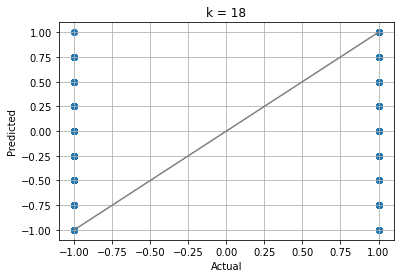

In [ ]:
model_KNN_best = KNeighborsRegressor( n_neighbors = 10, metric = 'manhattan') # train set의 행 수
model_KNN_best.fit(x_train_smm, y_train)
pred_KNN_best_test = model_KNN_best.predict(x_train_smm)

    # 결과 plotting
reg_plot(y_val, pred_KNN_mm, f'k = {18}') # 범주라 그런가 과적합이 안보임
plt.show()

ValueError: x and y must have same first dimension, but have shapes (29,) and (1,)

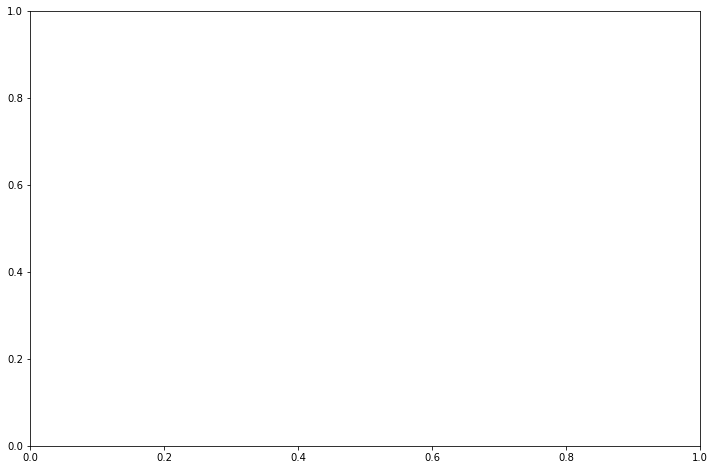

In [ ]:
# plt.figure(figsize = (12,8))
# plt.plot(k_values, result_train, label = 'train_acc', marker = 'o')
# plt.plot(k_values, result_val, label = 'val_acc', marker = 'o')

# plt.xlabel('Complexity')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid()
# plt.show()

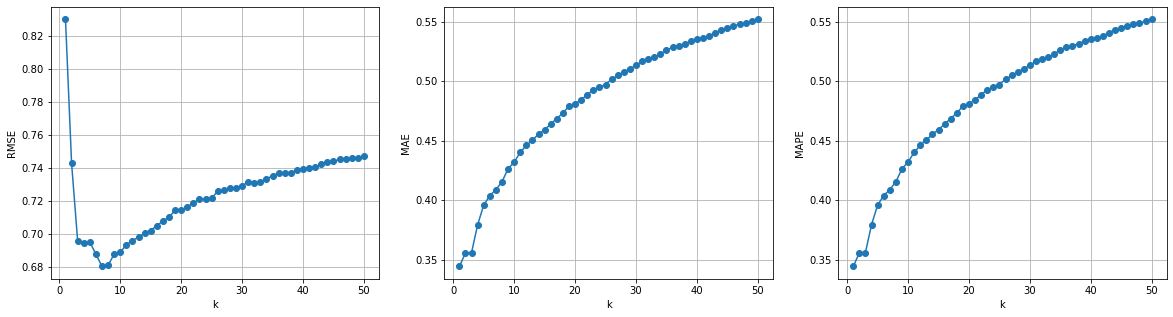

In [ ]:
# plt.figure(figsize = (20,5))

# plt.subplot(1,3,1)
# plt.plot(k_values, rmse, marker = 'o')
# plt.xlabel('k')
# plt.ylabel('RMSE')
# plt.grid()

# plt.subplot(1,3,2)
# plt.plot(k_values, mae, marker = 'o')
# plt.ylabel('MAE')
# plt.xlabel('k')
# plt.grid()

# plt.subplot(1,3,3)
# plt.plot(k_values, mape, marker = 'o')
# plt.ylabel('MAPE')
# plt.xlabel('k')
# plt.grid()

# plt.show()

- 과적합 여부

In [ ]:
# 결과 plotting
def reg_plot(y, pred, title='') :
    plt.scatter(y, pred_KNN_mm)
    lin_x = np.linspace(y.min(), y.max(), 20)
    plt.plot(lin_x, lin_x, color = 'gray')

    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

In [ ]:
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred_KNN_best})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer.csv')

,expected
id,
0,1
1,-1
2,-1
3,-1
4,1
...,...
2436,-1
2437,-1
2438,-1


In [ ]:
params = {'max_depth': range(1,11), 'min_samples_leaf':range(10,101,10) }

m = DecisionTreeClassifier()
m_gs = GridSearchCV(m, params, cv = 5, verbose = 3)

m_gs.fit(x_train, y_train)
print(m_gs.best_params_)
print(m_gs.best_score_)
pred = m_gs.predict(x_val)

print(confusion_matrix(y_val, pred))
print('-' * 50)
print(classification_report(y_val, pred))
display(pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..max_depth=1, min_samples_leaf=10;, score=0.728 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_leaf=10;, score=0.723 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_leaf=10;, score=0.701 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_leaf=10;, score=0.719 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_leaf=10;, score=0.690 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_leaf=20;, score=0.728 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_leaf=20;, score=0.723 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_leaf=20;, score=0.701 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_leaf=20;, score=0.719 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_leaf=20;, score=0.690 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_leaf=30;, score=0.728 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_leaf=3

array([ 1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
        1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
        1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1, -1,  1

In [ ]:
{'max_depth': 7, 'min_samples_leaf': 10}
m = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10)
m.fit(x_train, y_train)
p = m.predict(test)
p
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : p})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer3.csv')

,expected
id,
0,-1
1,1
2,1
3,-1
4,1
...,...
2436,1
2437,1
2438,-1


In [ ]:
print(pred.shape)
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer2.csv')

(970,)


ValueError: All arrays must be of the same length

In [ ]:
from sklearn.svm import SVC
params = { 'C' : np.linspace(0.1, 3, 10), 'gamma' : np.linspace(0.1, 3, 10) }
m = SVC()

# Random Search 설정.
m5 = GridSearchCV(m, params, cv=5, verbose = 3)
m5.fit(x_train_smm, y_train)
print(m5.best_params_)
# pred = model.predict(test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.616 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.668 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.710 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.670 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.673 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.42222222222222217;, score=0.667 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.42222222222222217;, score=0.675 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.42222222222222217;, score=0.697 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.42222222222222217;, score=0.677 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.42222222222222217;, score=0.679 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.7444444444444444;, score=0.709 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.744444444444444

In [ ]:
m = SVC(C = 1.5, gamma = 0.01)

# Random Search 설정.
m.fit(x_train_smm, y_train)
p = m.predict(test)
p

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [ ]:
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : p})
answer_df.set_index('id', inplace=True)
display(answer_df.describe())
answer_df.to_csv('answer4.csv')

,expected
count,2441.0
mean,-1.0
std,0.0
min,-1.0
25%,-1.0
50%,-1.0
75%,-1.0
max,-1.0


In [ ]:
params = {'n_estimators':[20,50,100], 'max_features':range(1,21), 'min_samples_leaf':[4, 6, 8, 12, 18], 'min_samples_split':[4, 6, 8, 16, 20]}
m = RandomForestClassifier()
m_gs1 = GridSearchCV(m, params, cv = 5, verbose = 3)
m_gs1.fit(x_train, y_train)
print(m_gs1.best_params_, m_gs1.best_score_)
p1 = m_gs1.predict(x_val)
print(classification_report(y_val, p1))

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
[CV 1/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.938 total time=   0.0s
[CV 2/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.918 total time=   0.0s
[CV 3/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.905 total time=   0.0s
[CV 4/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.898 total time=   0.0s
[CV 5/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.858 total time=   0.0s
[CV 1/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.925 total time=   0.0s
[CV 2/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.936 total time=   0.0s
[CV 3/5] END max_features=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.920 to

In [ ]:
params = {'n_estimators':[20,50,100], 'max_features':range(1,21)}
# 기본모델
m = RandomForestClassifier()

# 그리드서치 모델 선언
m_gs = GridSearchCV(m, params, cv = 5, verbose = 3)
m_gs.fit(x_train, y_train)
result = pd.DataFrame(m_gs.cv_results_)

temp = result[['param_n_estimators','param_max_features', 'mean_test_score']]
temp.head()

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ...max_features=1, n_estimators=20;, score=0.949 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=20;, score=0.920 total time=   0.0s
[CV 3/5] END ...max_features=1, n_estimators=20;, score=0.909 total time=   0.0s
[CV 4/5] END ...max_features=1, n_estimators=20;, score=0.936 total time=   0.0s
[CV 5/5] END ...max_features=1, n_estimators=20;, score=0.903 total time=   0.0s
[CV 1/5] END ...max_features=1, n_estimators=50;, score=0.949 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=50;, score=0.931 total time=   0.0s
[CV 3/5] END ...max_features=1, n_estimators=50;, score=0.916 total time=   0.0s
[CV 4/5] END ...max_features=1, n_estimators=50;, score=0.940 total time=   0.0s
[CV 5/5] END ...max_features=1, n_estimators=50;, score=0.903 total time=   0.0s
[CV 1/5] END ..max_features=1, n_estimators=100;, score=0.954 total time=   0.1s
[CV 2/5] END ..max_features=1, n_estimators=100

,param_n_estimators,param_max_features,mean_test_score
0,20,1,0.923474
1,50,1,0.927899
2,100,1,0.933649
3,20,2,0.927455
4,50,2,0.930997


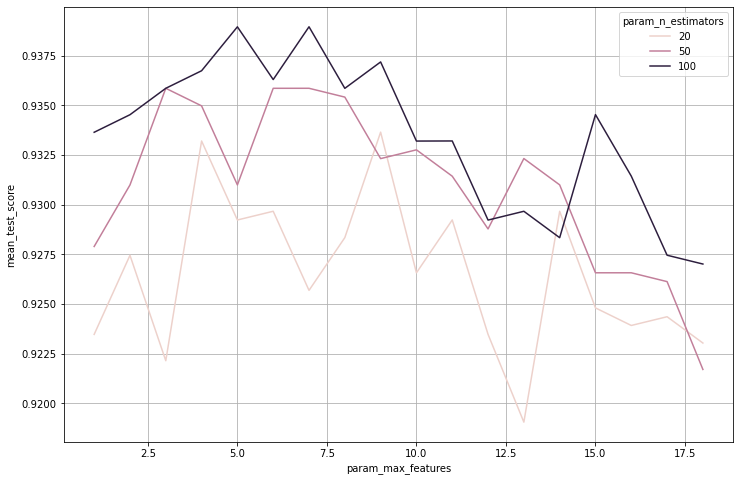

In [ ]:
plt.figure(figsize = (12,8))
sns.lineplot('param_max_features', 'mean_test_score', data = temp
             , hue = 'param_n_estimators')
plt.grid()
plt.show()

{'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50} 0.9270087323448397
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94       488
           1       0.93      0.94      0.94       482

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970

{'max_features': 9, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100} 0.9270145929789603
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94       488
           1       0.93      0.94      0.94       482

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970

In [479]:
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(x_train, y_train)
pred = rf_clf2.predict(test)
pred
# print(classification_report(test, pred))
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer15랜덤포레스트그냥.csv')

# print('예측 정확도 : ',accuracy_score(y_val, pred))

,expected
id,
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
2436,-1
2437,1
2438,-1


In [ ]:
m = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10)
m.fit(x_train, y_train)
p = m.predict(test)
p
# answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : p})
# answer_df.set_index('id', inplace=True)
# display(answer_df)
# answer_df.to_csv('answer3.csv')

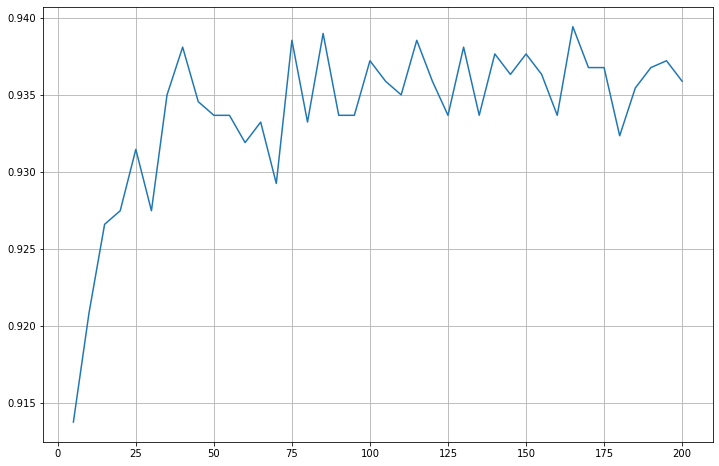

In [ ]:
# {'n_estimators': 165} 0.9394078805993475, 43정도가 best
# 튜닝 결과를 데이터프레임으로 저장
result = pd.DataFrame(m_gs1.cv_results_)
temp = result.loc[:, ['param_n_estimators', 'mean_test_score']]
temp.head()
plt.figure(figsize = (12,8))
plt.plot('param_n_estimators', 'mean_test_score', data = temp)
plt.grid()
plt.show()

In [ ]:
from xgboost import XGBClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_001 = le.fit_transform(y_train)
params = { 'max_depth':[1, 2, 3,4, 5,6, 7, 8], 'n_estimators':[10, 20, 30, 40, 50,100,120, 130, 150], 'learning_rate':[0.01, 0.05, 0.07, 0.1,0.15, 0.17, 0.2]}

m = XGBClassifier()
m_gs = GridSearchCV(m, params, cv = 5, verbose = 3)
m_gs.fit(x_train, y_train_001)
print(m_gs.best_params_, m_gs.best_score_)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.728 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.723 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.701 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.719 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.690 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.728 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.723 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.701 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.719 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=20;, score=0.690 total

In [ ]:
pred = m_gs.predict(x_val)
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

In [ ]:
test

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),query_len/query_para_(one_para_len)
0,97,0,80.0,17.0,17.0,4,0,0,4.844913,0,5.0,0,12,1,1,1.0,3.0,0.0
1,37,0,22.0,15.0,15.0,3,1,0,4.246157,1,0.0,0,158,1,1,0.0,0.0,0.0
2,44,0,0.0,20.0,20.0,3,3,0,4.612835,0,6.0,3,34,1,1,0.0,136.0,0.0
3,40,0,14.0,26.0,26.0,2,0,0,4.238521,0,0.0,0,29,1,1,1.0,2.0,0.0
4,43,2,0.0,26.0,26.0,2,0,0,4.240669,0,0.0,0,41,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,0.0,17.0,0.0,4,2,0,4.738082,1,18.0,0,79,1,1,1.0,119.0,0.0
2437,36,0,1.0,35.0,35.0,2,0,0,4.080351,0,27.0,0,57,1,1,1.0,0.0,0.0
2438,45,1,23.0,22.0,0.0,2,0,0,4.359443,0,8.0,0,199,1,1,2.0,0.0,0.0
2439,24,0,10.0,14.0,0.0,3,0,1,4.260333,0,3.0,0,90,1,1,2.0,25.0,0.0


In [ ]:
# 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100 # 0.9398493817031003
from xgboost import XGBClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from collections import Counter
le = LabelEncoder()
y_train_001 = le.fit_transform(y_train)
m = XGBClassifier(learning_rate= 0.2, max_depth= 7, n_estimators= 100)
m.fit(x_train, y_train_001)
pred = m.predict(test)
pred_xgboost_best = np.where(pred == 0, -1 , 1)
Counter(pred_xgboost_best)
# print(m)
# print(classification_report(y_val, pred))

Counter({-1: 1622, 1: 819})

In [ ]:
print(pred.shape)
answer_df = pd.DataFrame({'id' : range(0, 2441), 'expected' : pred_xgboost_best})
answer_df.set_index('id', inplace=True)
display(answer_df)
answer_df.to_csv('answer5.csv')

(2441,)


,expected
id,
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
2436,1
2437,-1
2438,-1
